In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weather_classification_data.csv')
df

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82         2  Winter              3.5    inland   
1                   1011.43         7  Spring             10.0    inland   
2                   1018.72         5  Spring              5.5  mountain   
3                   1026.25         7  Spring              1.0   coastal   
4                    990.67         1  Winter              2.5  mountain   
...                     ...       ...     ...              ...       ...   
13195               1003.15         1  Summer              1.0  mountain   
13196               1067.23         1  Winter              6.0   coastal   
13197               1012.69         3  Autumn              9.0   coastal   
13198                984.27         0  Winter              2.0    inland   
13199               1015.37         5  Autumn             10.0  mountain   

      Weather Type  
0            Rainy  
1           Cloudy  
2            Sunny  
3            Sunny  
4            Rainy  
...            ...  
13195        Rainy  
13196        Snowy  
13197       Cloudy  
13198        Snowy  
13199        Rainy  

[13200 rows x 11 columns]

Data Dictionary
--------------------------------------------------------------------------------------------------------------------
<p>Temperature (numeric): The temperature in degrees Celsius.</p>
<p>Humidity (numeric): The humidity percentage.</p>
<p>Wind Speed (numeric): The wind speed in kilometers per hour.</p>
<p>Precipitation (%) (numeric): The precipitation percentage.</p>
<p>Cloud Cover (categorical): The cloud cover description.</p>
<p>Atmospheric Pressure (numeric): The atmospheric pressure in hPa.</p>
<p>UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.</p>
<p>Season (categorical): The season during which the data was recorded.</p>
<p>Visibility (km) (numeric): The visibility in kilometers.</p>
<p>Location (categorical): The type of location where the data was recorded.</p>
<p>Weather Type (categorical): The target variable for classification, indicating the weather type.</p>

# 1. Exploratory Data Analysis

In [3]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

<ul>
    <li>Temperature has extreme outliers with a median of 21.0 and a max of 109.0</li>
    <li>Humidity has invalid values with a max of 109. Since Humidity is presented in percentages, Humidity values above 100 is considered invalid.</li>
    <li>Wind Speed has extreme outliers with a median of 9.0 and a max of 48.5</li>
    <li>Precipitation has invalid values with a max of 109. Since Precipitation is presented in percentages, Precipitation values above 100 is considered invalid.</li>
    <li>Visibility has extreme outliers with a median of 5.0 and max of 20.0</li>
</ul>

In [4]:
df_numerical = df.select_dtypes(include=np.number)
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame({'Lower Fence': Q1 - IQR.values, 'Upper Fence': Q3 + IQR.values})

Lower Fence  Upper Fence
Temperature              -23.0000       58.000
Humidity                  30.0000      111.000
Wind Speed                -3.5000       22.000
Precipitation (%)        -44.0000      145.000
Atmospheric Pressure     972.8275     1038.745
UV Index                  -5.0000       13.000
Visibility (km)           -1.5000       12.000

The lower and upper fences represent the threshold where outliers occur. They are calculated by the formula: Lower Fence = Q1 - 1.5 IQR and Upper Fence = Q3 + 1.5 IQR, where IQR (Interquartile Range) = Q3 - Q1. Any value in a column less than the lower fence or greater than the upper fence are considered outliers. 

Temperature                Axes(0.125,0.653529;0.227941x0.226471)
Humidity                Axes(0.398529,0.653529;0.227941x0.226471)
Wind Speed              Axes(0.672059,0.653529;0.227941x0.226471)
Precipitation (%)          Axes(0.125,0.381765;0.227941x0.226471)
Atmospheric Pressure    Axes(0.398529,0.381765;0.227941x0.226471)
UV Index                Axes(0.672059,0.381765;0.227941x0.226471)
Visibility (km)                Axes(0.125,0.11;0.227941x0.226471)
dtype: object

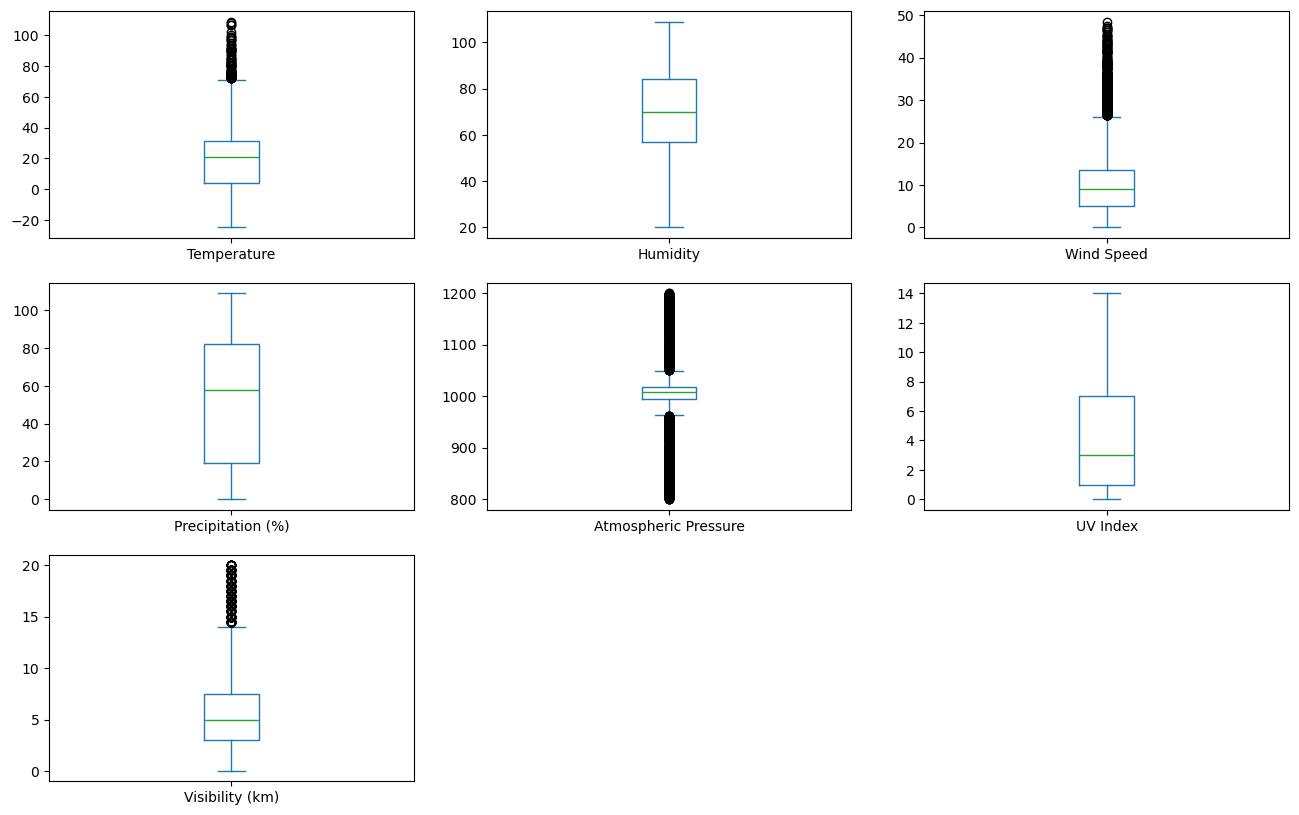

In [5]:
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(16, 10))

<p>From the box plot, the Temperature, Wind Speed, and Visiblity columns have upper outliers, while the Atmospheric Pressure column seems to have both upper and lower outliers.</p>

In [6]:
print(f'Unique Values of Cloud Cover: {df['Cloud Cover'].unique()}')
print(f'Unique Values of Season: {df['Season'].unique()}')
print(f'Unique Values of Location: {df['Location'].unique()}')
print(f'Unique Values of Weather Type: {df['Weather Type'].unique()}')

Unique Values of Cloud Cover: ['partly cloudy' 'clear' 'overcast' 'cloudy']
Unique Values of Season: ['Winter' 'Spring' 'Summer' 'Autumn']
Unique Values of Location: ['inland' 'mountain' 'coastal']
Unique Values of Weather Type: ['Rainy' 'Cloudy' 'Sunny' 'Snowy']


<p>Unique categories of Cloud Cover, Season, Location, and Weather Type seem normal</p>

In [7]:
df['Cloud Cover'].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

<p>The count of each unique value in Cloud Cover is not evenly spread and greatly skewed towards 'overcast' and 'partly cloudy'. 'cloudy' only has 411 occurences out of all 13200 rows, which is insufficient for the model to accurately predict data with a 'cloudy' Cloud Cover.</p>

In [8]:
df['Season'].value_counts()

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

<p>The count of each unique value in Season is evenly spread for all seasons except 'Winter'. The data is greatly skewed towards 'Winter', having double the count of the other seasons. Thus, the model may be more inaccurate and biased towards 'Winter'.</p>

In [9]:
df['Location'].value_counts()

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

<p>The count of each unique value in Location is quite evenly spread. However, 'coastal' does not have as many occurences as inland and mountain and predictions may not be fully accurate.</p>

In [10]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

<p>The count of each unique value in Weather Type is perfectly spread evenly.</p>

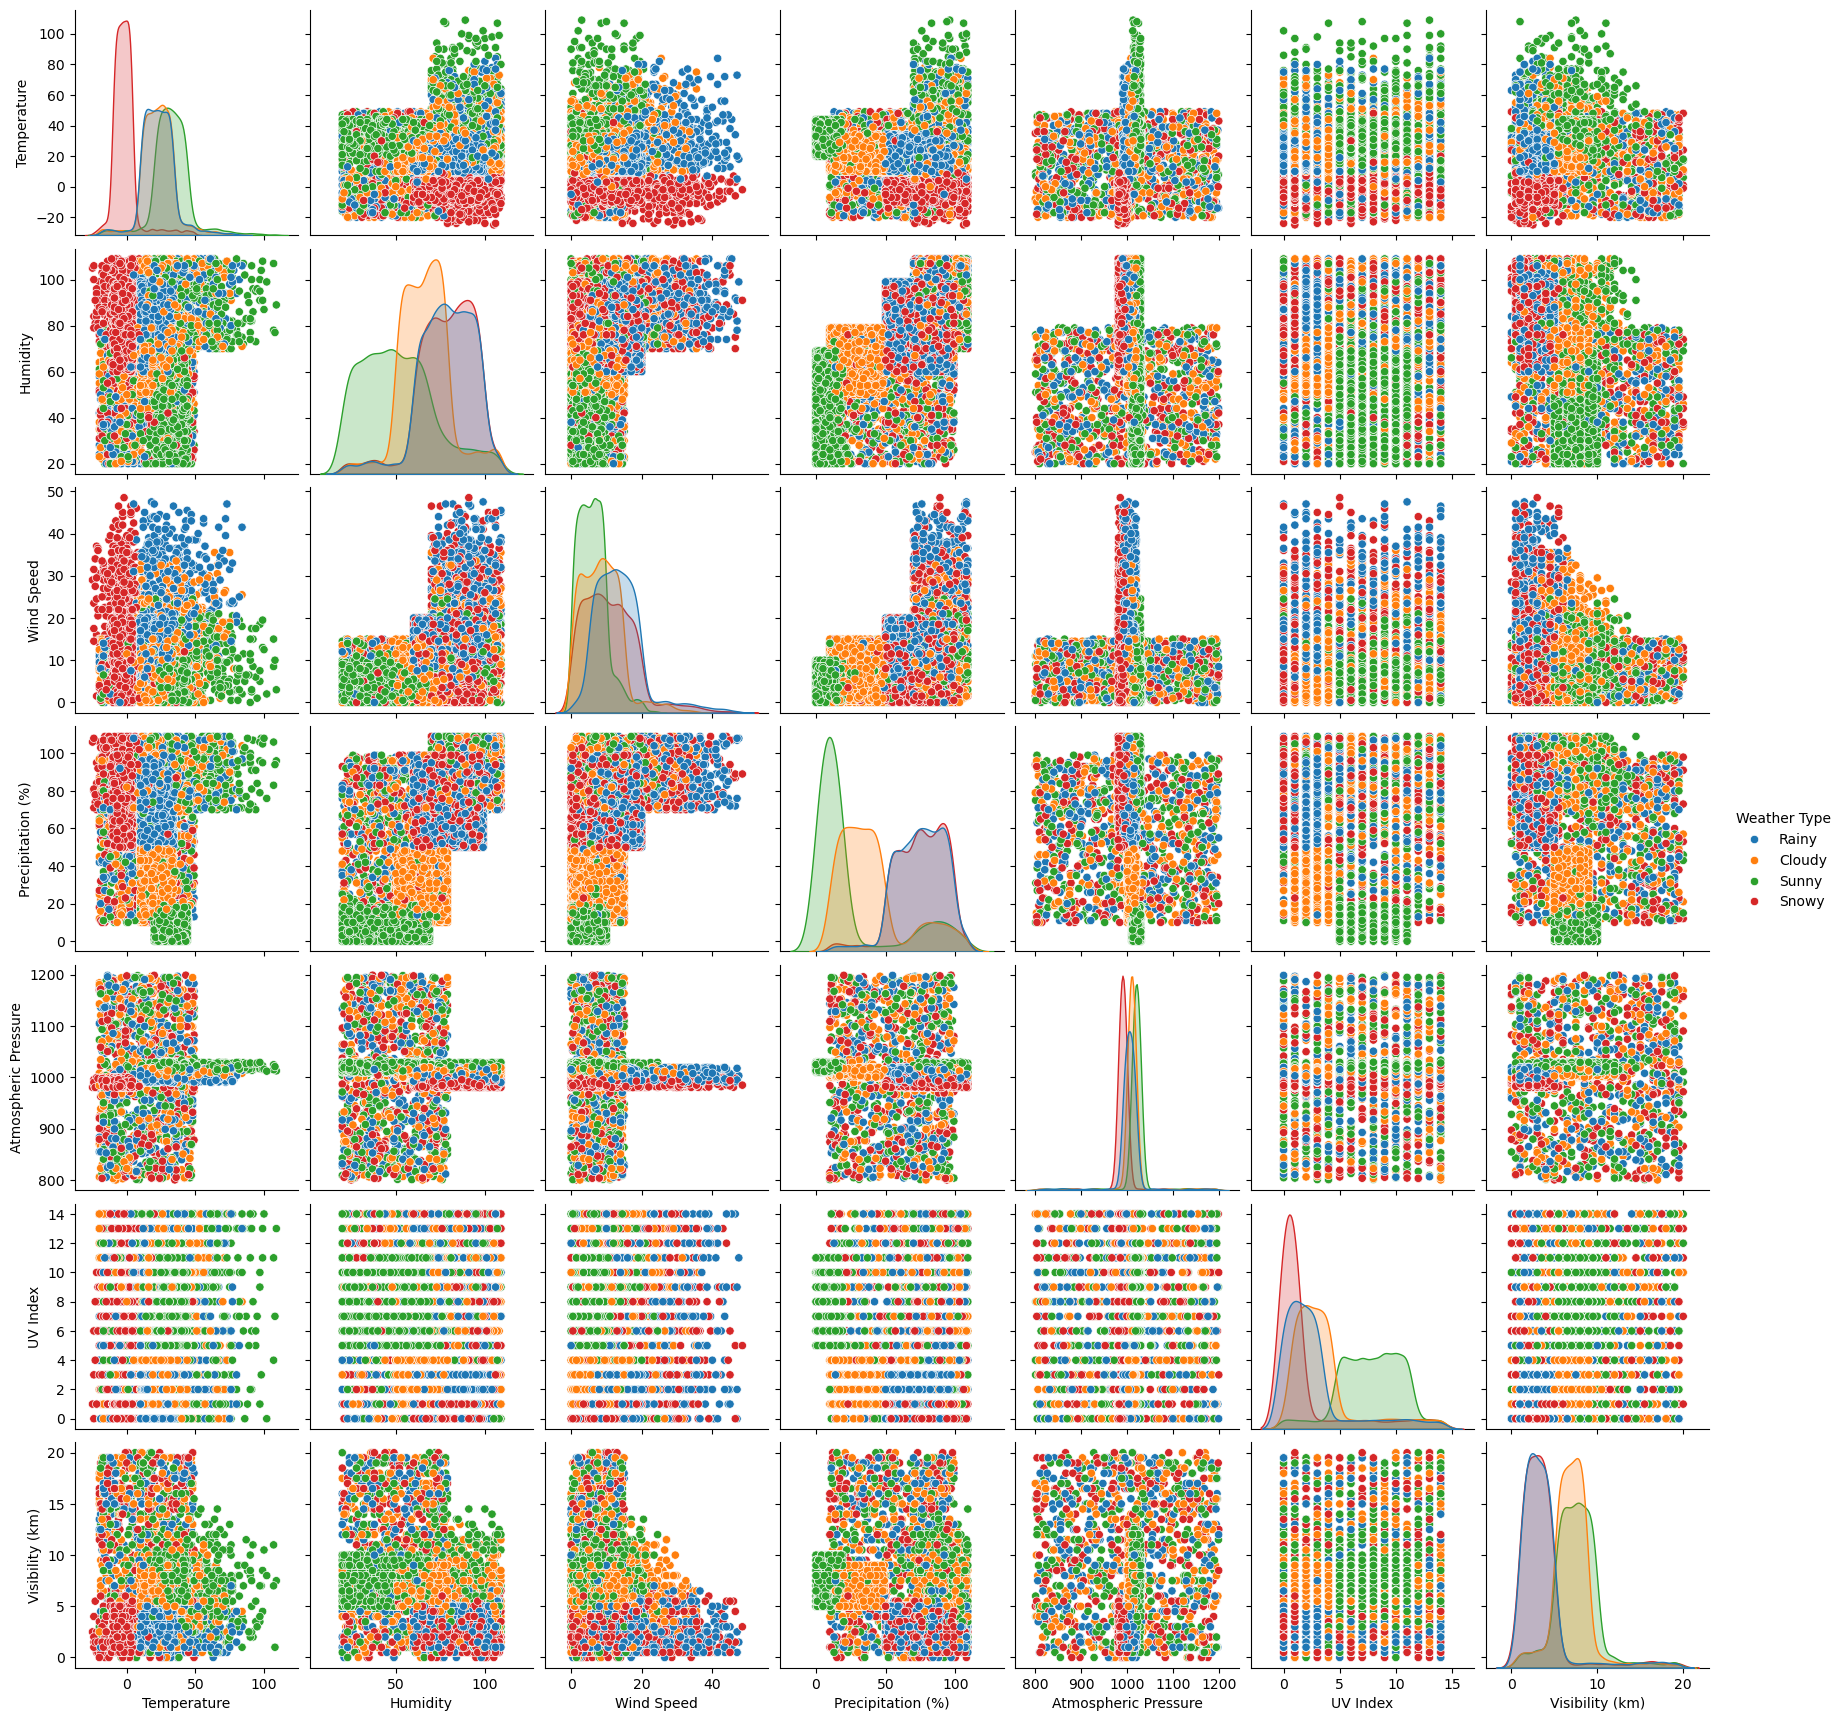

In [11]:
sns.pairplot(df, hue='Weather Type')

<ul>
    <li>Snowy weather tends to have low temperature (Near 0)</li>
    <li>Sunny weather tends to have low to medium humidity (20-75), Cloudy weather tends to have medium humidity (50-75), Rainy and Snowy weather tends to have medium to high humidity (60-100)</li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ul>

array([[<Axes: title={'center': 'Cloudy'}>,
        <Axes: title={'center': 'Rainy'}>],
       [<Axes: title={'center': 'Snowy'}>,
        <Axes: title={'center': 'Sunny'}>]], dtype=object)

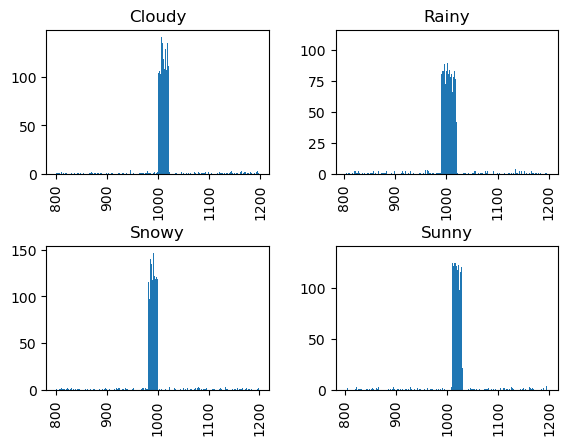

In [12]:
df.hist(column='Atmospheric Pressure', by="Weather Type", bins=500)

<p>Due to a low variance in the trends for Atmospheric Pressure, dropping of the Atmospheric Pressure column will be considered.</p>

# 2. Data Pre-processing

In [13]:
df = df[df['Humidity'] <= 100]
df = df[df['Precipitation (%)'] <= 100]
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  12483.000000  12483.000000  12483.000000       12483.000000   
mean      18.613074     67.100136      9.394577          51.207562   
std       16.672864     19.383613      6.360919          31.019456   
min      -24.000000     20.000000      0.000000           0.000000   
25%        4.000000     56.000000      5.000000          19.000000   
50%       21.000000     69.000000      8.500000          55.000000   
75%       30.000000     81.000000     13.000000          79.000000   
max      109.000000    100.000000     48.500000         100.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          12483.000000  12483.000000     12483.000000  
mean            1005.814698      3.824882         5.532244  
std               38.134520      3.746314         3.377035  
min              800.120000      0.000000         0.000000  
25%              994.695000      1.000000         3.000000  
50%             1007.660000      2.000000         5.000000  
75%             1016.825000      6.000000         7.500000  
max             1199.210000     14.000000        20.000000

<p>As previously pointed out, Humidity and Precipitation are represented by percentages and must not contain values greater than 100. Thus, any rows where Humidity and Precipitation are above 100 are removed from the dataset.</p>

In [14]:
df = pd.get_dummies(df, columns=['Cloud Cover', 'Season', 'Location'])
df

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0             14.0        73         9.5               82.0   
1             39.0        96         8.5               71.0   
2             30.0        64         7.0               16.0   
3             38.0        83         1.5               82.0   
4             27.0        74        17.0               66.0   
...            ...       ...         ...                ...   
13195         10.0        74        14.5               71.0   
13196         -1.0        76         3.5               23.0   
13197         30.0        77         5.5               28.0   
13198          3.0        76        10.0               94.0   
13199         -5.0        38         0.0               92.0   

       Atmospheric Pressure  UV Index  Visibility (km) Weather Type  \
0                   1010.82         2              3.5        Rainy   
1                   1011.43         7             10.0       Cloudy   
2                   1018.72         5              5.5        Sunny   
3                   1026.25         7              1.0        Sunny   
4                    990.67         1              2.5        Rainy   
...                     ...       ...              ...          ...   
13195               1003.15         1              1.0        Rainy   
13196               1067.23         1              6.0        Snowy   
13197               1012.69         3              9.0       Cloudy   
13198                984.27         0              2.0        Snowy   
13199               1015.37         5             10.0        Rainy   

       Cloud Cover_clear  Cloud Cover_cloudy  Cloud Cover_overcast  \
0                  False               False                 False   
1                  False               False                 False   
2                   True               False                 False   
3                   True               False                 False   
4                  False               False                  True   
...                  ...                 ...                   ...   
13195              False               False                  True   
13196              False                True                 False   
13197              False               False                  True   
13198              False               False                  True   
13199              False               False                  True   

       Cloud Cover_partly cloudy  Season_Autumn  Season_Spring  Season_Summer  \
0                           True          False          False          False   
1                           True          False           True          False   
2                          False          False           True          False   
3                          False          False           True          False   
4                          False          False          False          False   
...                          ...            ...            ...            ...   
13195                      False          False          False           True   
13196                      False          False          False          False   
13197                      False           True          False          False   
13198                      False          False          False          False   
13199                      False           True          False          False   

       Season_Winter  Location_coastal  Location_inland  Location_mountain  
0               True             False             True              False  
1              False             False             True              False  
2              False             False            False               True  
3              False              True            False              False  
4               True             False            False               True  
...              ...               ...              ...                ...  
13195          False             False      

One Hot Encoding is performed on all categorical columns except Weather Type, which helps to represent categorical data as numerical data by converting each column into many columns representing each unique value of the original column. With each column containing either 0 or 1, the models can then be fitted properly without errors.

In [15]:
df_no_atmo = df.drop(['Atmospheric Pressure'], axis=1)
df_no_atmo

Temperature  Humidity  Wind Speed  Precipitation (%)  UV Index  \
0             14.0        73         9.5               82.0         2   
1             39.0        96         8.5               71.0         7   
2             30.0        64         7.0               16.0         5   
3             38.0        83         1.5               82.0         7   
4             27.0        74        17.0               66.0         1   
...            ...       ...         ...                ...       ...   
13195         10.0        74        14.5               71.0         1   
13196         -1.0        76         3.5               23.0         1   
13197         30.0        77         5.5               28.0         3   
13198          3.0        76        10.0               94.0         0   
13199         -5.0        38         0.0               92.0         5   

       Visibility (km) Weather Type  Cloud Cover_clear  Cloud Cover_cloudy  \
0                  3.5        Rainy              False               False   
1                 10.0       Cloudy              False               False   
2                  5.5        Sunny               True               False   
3                  1.0        Sunny               True               False   
4                  2.5        Rainy              False               False   
...                ...          ...                ...                 ...   
13195              1.0        Rainy              False               False   
13196              6.0        Snowy              False                True   
13197              9.0       Cloudy              False               False   
13198              2.0        Snowy              False               False   
13199             10.0        Rainy              False               False   

       Cloud Cover_overcast  Cloud Cover_partly cloudy  Season_Autumn  \
0                     False                       True          False   
1                     False                       True          False   
2                     False                      False          False   
3                     False                      False          False   
4                      True                      False          False   
...                     ...                        ...            ...   
13195                  True                      False          False   
13196                 False                      False          False   
13197                  True                      False           True   
13198                  True                      False          False   
13199                  True                      False           True   

       Season_Spring  Season_Summer  Season_Winter  Location_coastal  \
0              False          False           True             False   
1               True          False          False             False   
2               True          False          False             False   
3               True          False          False              True   
4              False          False           True             False   
...              ...            ...            ...               ...   
13195          False           True          False             False   
13196          False          False           True              True   
13197          False          False          False              True   
13198          False          False           True             False   
13199          False          False          False             False   

       Location_inland  Location_mountain  
0                 True              False  
1                 True              False  
2                False               True  
3                False              False  
4                False               True  
...                ...                ...  
13195            False               True  
13196            False              False  
13197            False              False  
13198      

A seperate dataframe is created without the Atmospheric Pressure Column to compare models fitted with the column included to models fitted without the column included.

# 3. Model Building

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['Weather Type'], axis=1).to_numpy()
y = df['Weather Type'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=33550336)

X_no_atmo = df_no_atmo.drop(['Weather Type'], axis=1).to_numpy()
y_no_atmo = df_no_atmo['Weather Type'].to_numpy()

X_no_atmo_train, X_no_atmo_test, y_no_atmo_train, y_no_atmo_test = train_test_split(X_no_atmo, y_no_atmo, train_size=0.7, random_state=33550336)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

logr = LogisticRegression(random_state=33550336)
dtc = DecisionTreeClassifier(random_state=33550336)
svc = SVC(random_state=33550336)
rfc = RandomForestClassifier(random_state=33550336)
gbc = GradientBoostingClassifier(random_state=33550336)

logr.fit(X_train, y_train)
dtc.fit(X_train, y_train)
svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

logr_pred = logr.predict(X_test)
dtc_pred = dtc.predict(X_test)
svc_pred = svc.predict(X_test)
rfc_pred = rfc.predict(X_test)
gbc_pred = gbc.predict(X_test)

c:\Users\erosy\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Five different models will be tested and compared: Logistic Regression, Decision Tree Classifier, Support Vector Classifier, Random Forest Classfier, and Gradient Boosting Classifier. No hyperparameters will be tuned at this stage (except random_state). 

In [18]:
logr.fit(X_no_atmo_train, y_no_atmo_train)
dtc.fit(X_no_atmo_train, y_no_atmo_train)
svc.fit(X_no_atmo_train, y_no_atmo_train)
rfc.fit(X_no_atmo_train, y_no_atmo_train)
gbc.fit(X_no_atmo_train, y_no_atmo_train)

logr_no_atmo_pred = logr.predict(X_no_atmo_test)
dtc_no_atmo_pred = dtc.predict(X_no_atmo_test)
svc_no_atmo_pred = svc.predict(X_no_atmo_test)
rfc_no_atmo_pred = rfc.predict(X_no_atmo_test)
gbc_no_atmo_pred = gbc.predict(X_no_atmo_test)

c:\Users\erosy\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model fitting without Atmospheric Pressure column.

# 4. Model Evaluation and Hyperparameters Tuning

Logistic Regression (With Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.8472630173564752

              precision    recall  f1-score   support

      Cloudy       0.85      0.82      0.84       925
       Rainy       0.82      0.82      0.82       956
       Snowy       0.86      0.91      0.88       932
       Sunny       0.86      0.84      0.85       932

    accuracy                           0.85      3745
   macro avg       0.85      0.85      0.85      3745
weighted avg       0.85      0.85      0.85      3745



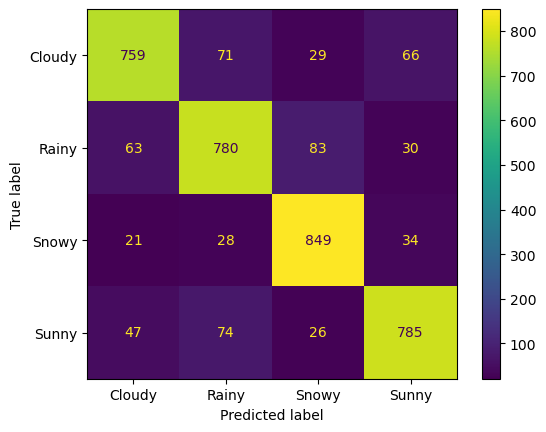

In [67]:
print('Logistic Regression (With Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_test, logr_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, logr_pred), display_labels=np.unique(logr_pred)).plot()
print(classification_report(y_test, logr_pred))

Logistic Regression (Without Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.8667556742323097

              precision    recall  f1-score   support

      Cloudy       0.82      0.86      0.84       925
       Rainy       0.89      0.83      0.86       956
       Snowy       0.87      0.92      0.90       932
       Sunny       0.88      0.85      0.87       932

    accuracy                           0.87      3745
   macro avg       0.87      0.87      0.87      3745
weighted avg       0.87      0.87      0.87      3745



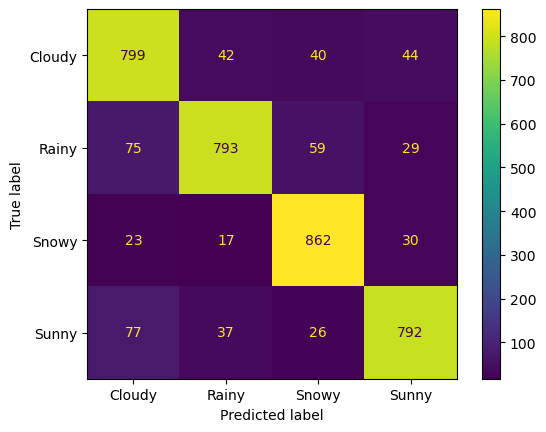

In [73]:
print('Logistic Regression (Without Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_no_atmo_test, logr_no_atmo_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_no_atmo_test, logr_no_atmo_pred), display_labels=np.unique(logr_no_atmo_pred)).plot()
print(classification_report(y_no_atmo_test, logr_no_atmo_pred))

Best Logistic Regression: Without Atmospheric Pressure

Accuracy: Performed better

Precision: Performed better for all Weather Types except Cloudy, which performed worse

Recall: Performed better for all Weather Types

Decision Tree Classifier (With Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.9113484646194927

              precision    recall  f1-score   support

      Cloudy       0.90      0.91      0.91       925
       Rainy       0.90      0.91      0.90       956
       Snowy       0.94      0.92      0.93       932
       Sunny       0.91      0.90      0.90       932

    accuracy                           0.91      3745
   macro avg       0.91      0.91      0.91      3745
weighted avg       0.91      0.91      0.91      3745



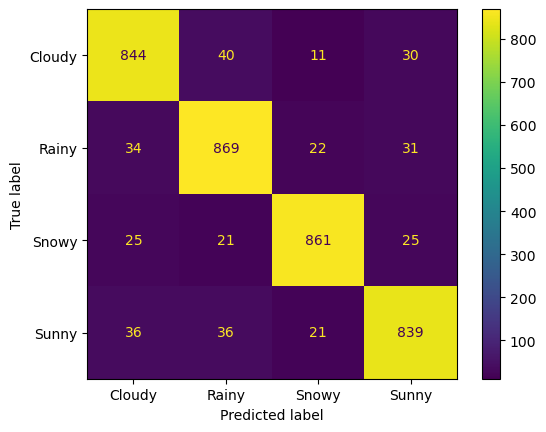

In [68]:
print('Decision Tree Classifier (With Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_test, dtc_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, dtc_pred), display_labels=np.unique(dtc_pred)).plot()
print(classification_report(y_test, dtc_pred))

Decision Tree Classifier (Without Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.9100133511348465

              precision    recall  f1-score   support

      Cloudy       0.89      0.91      0.90       925
       Rainy       0.90      0.90      0.90       956
       Snowy       0.93      0.93      0.93       932
       Sunny       0.92      0.90      0.91       932

    accuracy                           0.91      3745
   macro avg       0.91      0.91      0.91      3745
weighted avg       0.91      0.91      0.91      3745



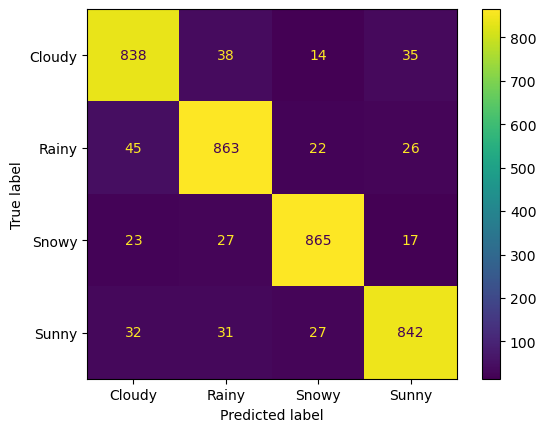

In [74]:
print('Decision Tree Classifier (Without Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_no_atmo_test, dtc_no_atmo_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_no_atmo_test, dtc_no_atmo_pred), display_labels=np.unique(dtc_no_atmo_pred)).plot()
print(classification_report(y_no_atmo_test, dtc_no_atmo_pred))

Best Decision Tree Classifier: With Atmospheric Pressure (Negligible Difference)

Accuracy: Performed slightly better

Precision: Performed slightly better for Cloudy and Snowy, while Rainy performed the same and Sunny performed slightly worse

Recall: Performed the same for Cloudy and Sunny, while Rainy performed better and Snowy performed slightly worse

Support Vector Classification (With Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.8467289719626169

              precision    recall  f1-score   support

      Cloudy       0.83      0.80      0.82       925
       Rainy       0.80      0.86      0.83       956
       Snowy       0.89      0.94      0.91       932
       Sunny       0.87      0.79      0.83       932

    accuracy                           0.85      3745
   macro avg       0.85      0.85      0.85      3745
weighted avg       0.85      0.85      0.85      3745



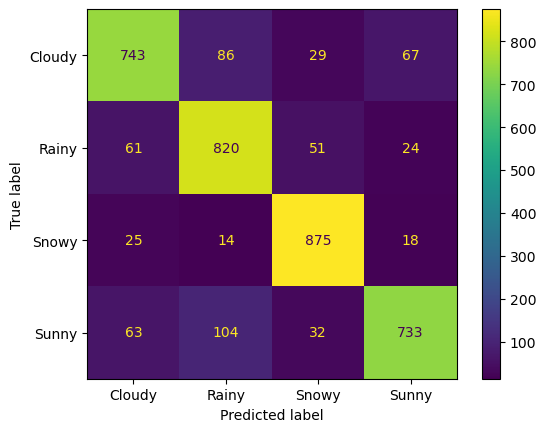

In [69]:
print('Support Vector Classification (With Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_test, svc_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, svc_pred), display_labels=np.unique(svc_pred)).plot()
print(classification_report(y_test, svc_pred))

Support Vector Classification (Without Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.8913217623497998

              precision    recall  f1-score   support

      Cloudy       0.85      0.86      0.85       925
       Rainy       0.89      0.90      0.90       956
       Snowy       0.92      0.93      0.93       932
       Sunny       0.91      0.87      0.89       932

    accuracy                           0.89      3745
   macro avg       0.89      0.89      0.89      3745
weighted avg       0.89      0.89      0.89      3745



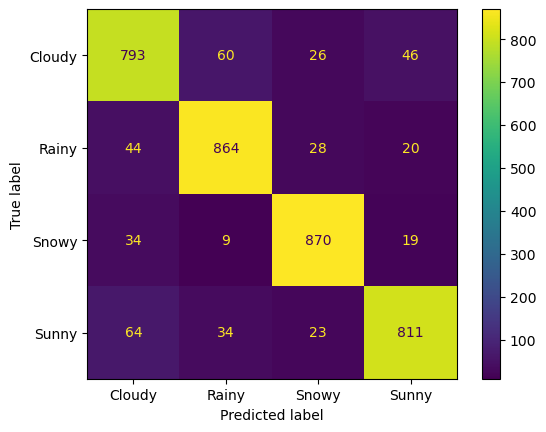

In [75]:
print('Support Vector Classification (Without Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_no_atmo_test, svc_no_atmo_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_no_atmo_test, svc_no_atmo_pred), display_labels=np.unique(svc_no_atmo_pred)).plot()
print(classification_report(y_no_atmo_test, svc_no_atmo_pred))

Best Support Vector Classification: Without Atmospheric Pressure

Accuracy: Performed better

Precision: Performed better for all Weather Types

Recall: Performed better for all Weather Types except Snowy, which performed slightly worse

Random Forest Classifier (With Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.9177570093457944

              precision    recall  f1-score   support

      Cloudy       0.86      0.93      0.89       925
       Rainy       0.93      0.92      0.92       956
       Snowy       0.95      0.93      0.94       932
       Sunny       0.93      0.90      0.91       932

    accuracy                           0.92      3745
   macro avg       0.92      0.92      0.92      3745
weighted avg       0.92      0.92      0.92      3745



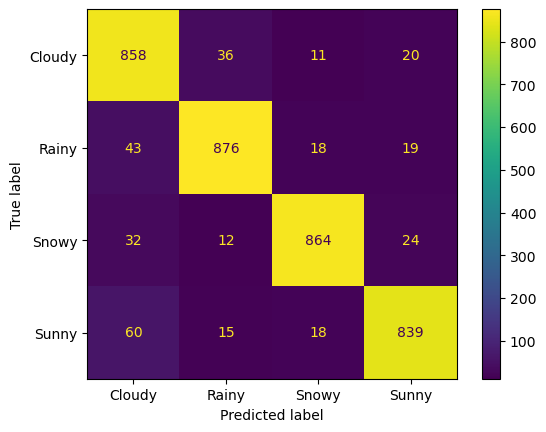

In [70]:
print('Random Forest Classifier (With Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_test, rfc_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, rfc_pred), display_labels=np.unique(rfc_pred)).plot()
print(classification_report(y_test, rfc_pred))

Random Forest Classifier (Without Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.9108144192256342

              precision    recall  f1-score   support

      Cloudy       0.86      0.92      0.89       925
       Rainy       0.91      0.91      0.91       956
       Snowy       0.93      0.93      0.93       932
       Sunny       0.94      0.89      0.91       932

    accuracy                           0.91      3745
   macro avg       0.91      0.91      0.91      3745
weighted avg       0.91      0.91      0.91      3745



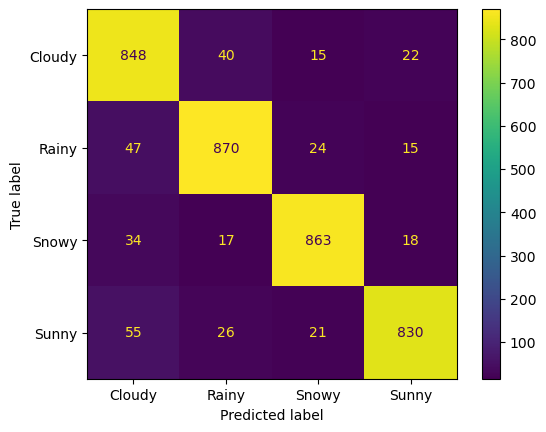

In [76]:
print('Random Forest Classifier (Without Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_no_atmo_test, rfc_no_atmo_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_no_atmo_test, rfc_no_atmo_pred), display_labels=np.unique(rfc_no_atmo_pred)).plot()
print(classification_report(y_no_atmo_test, rfc_no_atmo_pred))

Best Random Forest Classifier: With Atmospheric Pressure (Negligible Difference)

Accuracy: Performed slightly better

Precision: Performed slightly better for Rainy and Snowy, while Sunny performed slightly worse

Recall: Performed slightly better for all Weather Types except Snowy, which stayed the same

Gradient Boosting Classifier (With Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.914018691588785

              precision    recall  f1-score   support

      Cloudy       0.88      0.91      0.90       925
       Rainy       0.91      0.92      0.91       956
       Snowy       0.93      0.92      0.93       932
       Sunny       0.93      0.90      0.91       932

    accuracy                           0.91      3745
   macro avg       0.91      0.91      0.91      3745
weighted avg       0.91      0.91      0.91      3745



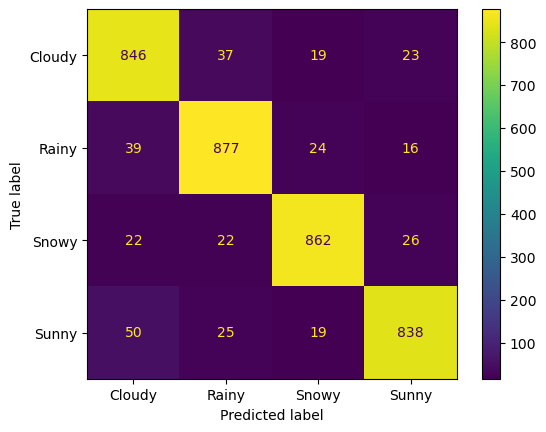

In [71]:
print('Gradient Boosting Classifier (With Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_test, gbc_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, gbc_pred), display_labels=np.unique(gbc_pred)).plot()
print(classification_report(y_test, gbc_pred))

Gradient Boosting Classifier (Without Atmospheric Pressure)
----------------------------------------------------------------------------------------------------
Accuracy: 0.9108144192256342

              precision    recall  f1-score   support

      Cloudy       0.87      0.91      0.89       925
       Rainy       0.92      0.91      0.91       956
       Snowy       0.93      0.93      0.93       932
       Sunny       0.93      0.89      0.91       932

    accuracy                           0.91      3745
   macro avg       0.91      0.91      0.91      3745
weighted avg       0.91      0.91      0.91      3745



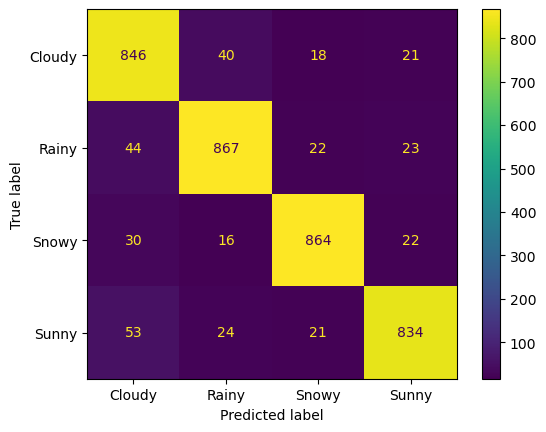

In [77]:
print('Gradient Boosting Classifier (Without Atmospheric Pressure)')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_no_atmo_test, gbc_no_atmo_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_no_atmo_test, gbc_no_atmo_pred), display_labels=np.unique(gbc_no_atmo_pred)).plot()
print(classification_report(y_no_atmo_test, gbc_no_atmo_pred))

Best Gradient Boosting Classifier: With Atmospheric Pressure (Negligible Difference)

Accuracy: Performed slightly better

Precision: Only performed slightly better for Cloudy, while Rainy performed slightly worse

Recall: Performed slightly better for Rainy and Sunny, while Snowy performed slightly worse

### Since the number of occurences of each Weather Type in the dataframe is balanced, the models' performances will be judged based on accuracy score.

### From the 5 different classification models, 3 of them performed better with the Atmospheric Pressure Column included while the other 2 performed better without the column.

### However, in those 3 models, the difference in accuracy between including the Atmospheric Pressure Column and not including the column is negligible (<0.01 difference), and the difference in both precision and recall are also negligible and show slight variance in performance.

### Since removing the Atmospheric Pressure column gives an overall boost to some models while minimizing the drop in performance of other models, the Atmospheric Pressure column will be dropped and further actions will only be performed without the column.

In [31]:
df = df_no_atmo
X = df.drop(['Weather Type'], axis=1).to_numpy()
y = df['Weather Type'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=33550336)

2 models, Random Forest Classifier and Gradient Boosting Classifier, will be selected for further refining of the models due to both models having very similar performance, and both models performed the best out of the others.

In [32]:
rfc = RandomForestClassifier(random_state=33550336)
gbc = GradientBoostingClassifier(random_state=33550336)

rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
gbc_pred = gbc.predict(X_test)

In [33]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_dist = {
    'n_estimators': range(20, 100),
    'min_samples_split': range(50, 100),
    'min_samples_leaf': range(20, 100)
}
rfc = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=33550336, n_jobs=1), param_distributions=param_dist, scoring='accuracy')
rfc.fit(X_train, y_train)
print(rfc.best_params_)
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [rfc.best_params_['n_estimators']-10, rfc.best_params_['n_estimators']-5, rfc.best_params_['n_estimators'], rfc.best_params_['n_estimators']+5, rfc.best_params_['n_estimators']+10],
    'min_samples_split': [rfc.best_params_['min_samples_split']-10, rfc.best_params_['min_samples_split']-5, rfc.best_params_['min_samples_split'], rfc.best_params_['min_samples_split']+5, rfc.best_params_['min_samples_split']+10],
    'min_samples_leaf': [rfc.best_params_['min_samples_leaf']-10, rfc.best_params_['min_samples_leaf']-5, rfc.best_params_['min_samples_leaf'], rfc.best_params_['min_samples_leaf']+5, rfc.best_params_['min_samples_leaf']+10]
}
rfc = GridSearchCV(estimator=rfc.best_estimator_, param_grid=param_grid, scoring='accuracy')
rfc.fit(X_train, y_train)
print(rfc.best_params_)

{'n_estimators': 57, 'min_samples_split': 81, 'min_samples_leaf': 45}
{'criterion': 'entropy', 'min_samples_leaf': 35, 'min_samples_split': 81, 'n_estimators': 47}


Several attempts were made to tune the hyperparameters of the Random Forest Classifier using both RandomizedSearchCV and GridSearchCV by adjusting the hyperparameters included and the range of values for each hyperparameter in param_list and param_grid. However, any adjustments done to the hyperparameters seemed to cause very minor fluctuations in the accuracy score. Most of these attempts did not result in any significant change in the model's performance, either being very minor improvements or very minor decline.

In [34]:
X = df.drop(['Weather Type'], axis=1)
y = df['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=33550336)

Random Forest Classifier
----------------------------------------------------------------------------------------------------
Accuracy: 0.909479305740988

              precision    recall  f1-score   support

      Cloudy       0.83      0.92      0.87       925
       Rainy       0.92      0.91      0.91       956
       Snowy       0.97      0.92      0.94       932
       Sunny       0.93      0.89      0.91       932

    accuracy                           0.91      3745
   macro avg       0.91      0.91      0.91      3745
weighted avg       0.91      0.91      0.91      3745



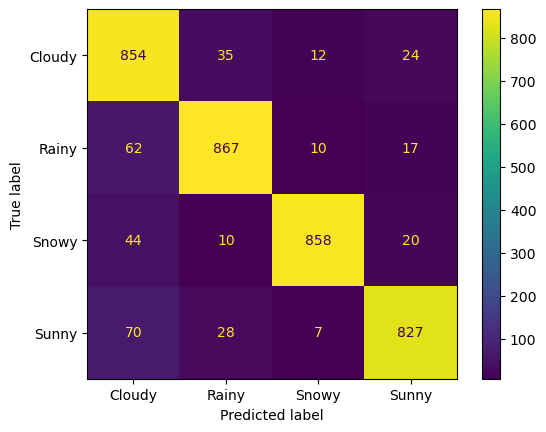

In [35]:
rfc_final = rfc.best_estimator_
rfc_final.fit(X_train, y_train)
rfc_final_pred = rfc_final.predict(X_test)
print('Random Forest Classifier')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_test, rfc_final_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, rfc_final_pred), display_labels=np.unique(rfc_final_pred)).plot()
print(classification_report(y_test, rfc_final_pred))

### Random Forest Classifier Baseline:

Accuracy: 0.9108144192256342

Confusion Matrix:

[[848  40  15  22]

 [ 47 870  24  15]

 [ 34  17 863  18]

 [ 55  26  21 830]]

              precision    recall  f1-score   support

      Cloudy       0.86      0.92      0.89       925
       Rainy       0.91      0.91      0.91       956
       Snowy       0.93      0.93      0.93       932
       Sunny       0.94      0.89      0.91       932

    accuracy                           0.91      3745
    macro avg       0.91      0.91      0.91      3745
    weighted avg       0.91      0.91      0.91      3745

In [36]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_dist = {
    'n_estimators': range(20, 85),
    'min_samples_split': range(20, 85),
    'min_samples_leaf': range(20, 85),
    'learning_rate': np.arange(0.1, 5.0, 0.01)
}
gbc = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=33550336), param_distributions=param_dist, scoring='accuracy')
gbc.fit(X_train, y_train)
print(gbc.best_params_)
param_grid = {
    'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [gbc.best_params_['n_estimators']-10, gbc.best_params_['n_estimators']-5, gbc.best_params_['n_estimators'], gbc.best_params_['n_estimators']+5, gbc.best_params_['n_estimators']+10],
    'min_samples_split': [gbc.best_params_['min_samples_split']-10, gbc.best_params_['min_samples_split']-5, gbc.best_params_['min_samples_split'], gbc.best_params_['min_samples_split']+5, gbc.best_params_['min_samples_split']+10],
    'min_samples_leaf': [gbc.best_params_['min_samples_leaf']-10, gbc.best_params_['min_samples_leaf']-5, gbc.best_params_['min_samples_leaf'], gbc.best_params_['min_samples_leaf']+5, gbc.best_params_['min_samples_leaf']+10]
}
gbc = GridSearchCV(estimator=gbc.best_estimator_, param_grid=param_grid, scoring='accuracy')
gbc.fit(X_train, y_train)
print(gbc.best_params_)

{'n_estimators': 44, 'min_samples_split': 67, 'min_samples_leaf': 27, 'learning_rate': 0.4199999999999998}
{'criterion': 'friedman_mse', 'min_samples_leaf': 27, 'min_samples_split': 67, 'n_estimators': 44}


Several attempts were made to tune the hyperparameters of the Gradient Boosting Classifier using both RandomizedSearchCV and GridSearchCV by adjusting the hyperparameters included and the range of values for each hyperparameter in param_list and param_grid. However, similar to the previous hyperparameters tuning of the Random Forest Classifier model, any adjustments done to the hyperparameters seemed to cause very minor fluctuations in the accuracy score. Most of these attempts did not result in any significant change in the model's performance, either being very minor improvements or very minor decline.

In [41]:
print(gbc.best_estimator_)

GradientBoostingClassifier(learning_rate=0.4199999999999998,
                           min_samples_leaf=27, min_samples_split=67,
                           n_estimators=44, random_state=33550336)


In [19]:
df = pd.read_csv('weather_classification_data.csv')

df = df[df['Humidity'] <= 100]
df = df[df['Precipitation (%)'] <= 100]
df = df.drop(['Atmospheric Pressure'], axis=1)
df = pd.get_dummies(df, columns=['Cloud Cover'])


X = df.drop(['Weather Type', 'Wind Speed', 'Location', 'Season'], axis=1)
y = df['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=33550336)

The feature importances (found near bottom of notebook) tell us that Wind Speed, Location, and Season do not affect the prediction significantly. The columns are removed and the dataframe is used to fit the Gradient Boosting Classifier in order to test whether removing the columns would improve the accuracy score.

Removing the Wind Speed, Location, and Season columns based on feature importances and using remaining data to fit the Gradient Boosting Classifier model has slightly improved the model, based on accuracy score. Therefore, this will be the exact model to deploy to the web application.

In [20]:
gbc_final = GradientBoostingClassifier(learning_rate=0.4199999999999998, min_samples_leaf=27, min_samples_split=67, n_estimators=44, random_state=33550336)

gbc_final.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.4199999999999998,
                           min_samples_leaf=27, min_samples_split=67,
                           n_estimators=44, random_state=33550336)

Gradient Boosting Classifier
----------------------------------------------------------------------------------------------------
Accuracy: 0.9166889185580774

              precision    recall  f1-score   support

      Cloudy       0.89      0.93      0.91       925
       Rainy       0.91      0.92      0.91       956
       Snowy       0.93      0.92      0.93       932
       Sunny       0.93      0.90      0.92       932

    accuracy                           0.92      3745
   macro avg       0.92      0.92      0.92      3745
weighted avg       0.92      0.92      0.92      3745



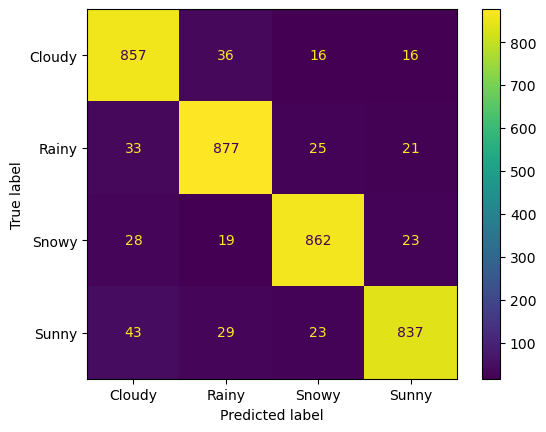

In [21]:
# gbc_final = gbc.best_estimator_
# gbc_final.fit(X_train, y_train)
gbc_final_pred = gbc_final.predict(X_test)

print('Gradient Boosting Classifier')
print('-' * 100)
print(f'Accuracy: {accuracy_score(y_test, gbc_final_pred)}\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, gbc_final_pred), display_labels=np.unique(gbc_final_pred)).plot()
print(classification_report(y_test, gbc_final_pred))

### Gradient Boosting Classifier Baseline:
Accuracy: 0.9108144192256342

Confusion Matrix:

[[846  40  18  21]

 [ 44 867  22  23]

 [ 30  16 864  22]

 [ 53  24  21 834]]

              precision    recall  f1-score   support

      Cloudy       0.87      0.91      0.89       925
       Rainy       0.92      0.91      0.91       956
       Snowy       0.93      0.93      0.93       932
       Sunny       0.93      0.89      0.91       932

    accuracy                           0.91      3745
    macro avg       0.91      0.91      0.91      3745
    weighted avg       0.91      0.91      0.91      3745

Since the Gradient Boosting Classifier's accuracy score is slightly greater than the Random Forest Classifier's accuracy score after hyperparameters tuning, Gradient Boosting Classifier is chosen as the model to deploy to the web application

In [24]:
feature_importances = gbc_final.feature_importances_
# columns = df.drop(['Weather Type'], axis=1).columns

# feature_importances_df = pd.DataFrame({'Column': columns, 'Importance': feature_importances})
feature_importances_df = pd.DataFrame({'Column': X.columns, 'Importance': feature_importances})
feature_importances_df.sort_values(by='Importance', ascending=False)

Column  Importance
0                Temperature    0.367509
3                   UV Index    0.188035
5          Cloud Cover_clear    0.170561
2          Precipitation (%)    0.123446
4            Visibility (km)    0.114281
1                   Humidity    0.026907
6         Cloud Cover_cloudy    0.007075
7       Cloud Cover_overcast    0.001650
8  Cloud Cover_partly cloudy    0.000536

The feature importances of the Gradient Boosting Classifier shows that the Season, Location, and Wind Speed columns affects the model the least. Another Gradient Boosting Classifier model will be trained to verify if removing these columns helps the model achieve a better accuracy score.

In [33]:
import joblib
joblib.dump(gbc_final, 'model.pkl')

['model.pkl']

In [32]:
X_test['Weather Type Actual'] = y_test
X_test['Weather Type Prediction'] = gbc_final_pred
X_test

Temperature  Humidity  Precipitation (%)  UV Index  Visibility (km)  \
2191          -3.0        42               23.0        10              6.0   
1408          11.0        55               16.0         4              6.5   
7570          31.0        65               96.0         1              4.5   
7389          26.0        57                3.0         6              8.5   
9033          28.0        62               11.0         5              6.5   
...            ...       ...                ...       ...              ...   
2357          30.0        36               13.0         9              5.5   
9658          23.0        57               42.0         3              8.5   
2149          35.0        58                6.0        11              6.0   
11491         -6.0        64               96.0         0              3.0   
9933          24.0        29               13.0         9              6.5   

       Cloud Cover_clear  Cloud Cover_cloudy  Cloud Cover_overcast  \
2191               False               False                  True   
1408               False               False                  True   
7570               False               False                  True   
7389                True               False                 False   
9033                True               False                 False   
...                  ...                 ...                   ...   
2357                True               False                 False   
9658               False               False                  True   
2149               False               False                 False   
11491              False               False                 False   
9933                True               False                 False   

       Cloud Cover_partly cloudy Weather Type Prediction Weather Type Actual  
2191                       False                   Snowy               Rainy  
1408                       False                  Cloudy              Cloudy  
7570                       False                   Rainy               Rainy  
7389                       False                   Sunny               Sunny  
9033                       False                   Sunny               Sunny  
...                          ...                     ...                 ...  
2357                       False                   Sunny               Sunny  
9658                       False                  Cloudy              Cloudy  
2149                        True                   Sunny               Sunny  
11491                       True                   Snowy               Snowy  
9933                       False                   Sunny               Sunny  

[3745 rows x 11 columns]